In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [180]:
class Spring():
    def __init__(self, k: float=1):
        self.__k = k
    
    def get_k(self):
        return self.__k
    
    def __set_k(self, k):
        self.__k = k
    
    def move(self, t0: float, dt: float, x0: float, v0: float=0, t1: float=None, m: float=1, plot: bool=False):
        omega = math.sqrt(self.__k / m)
        A = x0
        B = v0 / omega
        print(f'Freq: {omega/(2*np.pi)} Hz')
        
        if t1 is None:
            t1 = t0 + 100 * dt
            
        def __move(A, B, omega, t):
            return A*math.cos(omega*t) + B*math.sin(omega*t)
        
        x = []
        times = np.arange(t0, t1, dt, dtype=float)
        for t in times:
            x.append(__move(A, B, omega, t))
            
        if plot:
            fig = plt.figure(figsize=(10, 4))
            plt.plot(times, x)
            
        return np.array(x)
    
    def inSeries(self, that):
        k1 = self.__k
        k2 = that.get_k()
        new_k = 1 / ((1/k1) + (1/k2))
        
        return Spring(new_k)
    
    def inParallel(self, that):
        k1 = self.__k
        k2 = that.get_k()
        new_k = k1 + k2
        
        return Spring(new_k)
    
    
class SpringArray():
    def equivalentSpring(self, springExpr: str, springs: list=None):
        stack = []
        for i in springExpr:
            if i in '[{':
                stack.append(i)
            elif i == ']':
                subsprings = []
                j = stack.pop()
                
                while j != '[':
                    subsprings.append(j)
                    j = stack.pop()
                    
                if subsprings:
                    resulting_spring = subsprings.pop(0)
                    if subsprings:
                        for spring in subsprings:
                            resulting_spring = resulting_spring.inParallel(spring)
                else:
                    if springs is not None:
                        try:
                            resulting_spring = springs.pop(0)
                        except Exception as e:
                            raise ValueError('Not enough Springs were passed.')
                    else:
                        resulting_spring = Spring()
                    
                stack.append(resulting_spring)
            elif i == '}':
                subsprings = []
                j = stack.pop()
                resulting_spring = None
                
                while j != '{':
                    subsprings.append(j)
                    j = stack.pop()
                    
                if subsprings:
                    resulting_spring = subsprings.pop(0)
                    if subsprings:
                        for spring in subsprings:
                            resulting_spring = resulting_spring.inSeries(spring)
                else:
                    if springs is not None:
                        try:
                            resulting_spring = springs.pop(0)
                        except Exception as e:
                            raise ValueError('Not enough Springs were passed.')
                if resulting_spring:    
                    stack.append(resulting_spring)
                
        resulting_spring = stack.pop()
        
        if stack:
            raise ValueError('Unbalanced expression was passed! Please pass a correct spring expression.')
            
        return resulting_spring   

Freq: 0.39894228040143265 Hz


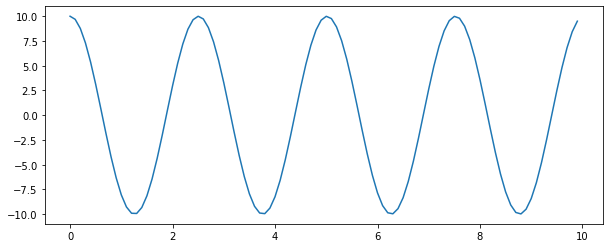

In [181]:
dt = 0.1
s = Spring(2*np.pi)
x = s.move(0, dt, 10, plot=True)

Freq: 0.39894228040143265 Hz
Freq: 0.5641895835477563 Hz
Freq: 0.6909882989426709 Hz


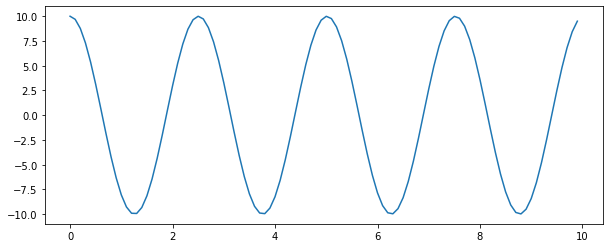

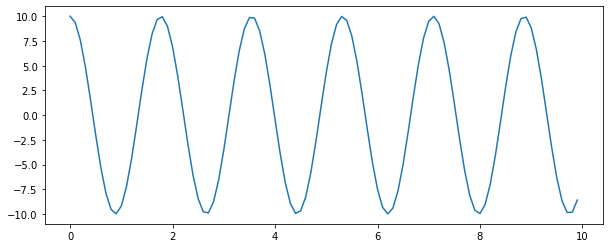

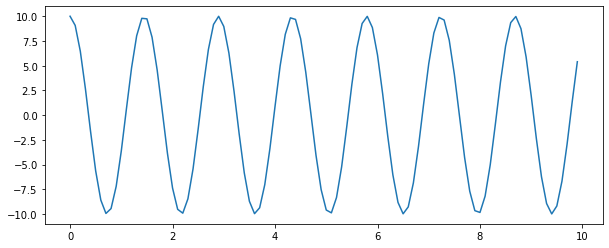

In [203]:
sa = SpringArray()
s = sa.equivalentSpring('[[][][]]', [Spring(2*np.pi), Spring(4*np.pi), Spring(6*np.pi)])
x = Spring(2*np.pi).move(0, dt, 10, plot=True)
x += Spring(4*np.pi).move(0, dt, 10, plot=True)
x += Spring(6*np.pi).move(0, dt, 10, plot=True)

In [204]:
len(x)

100

<StemContainer object of 3 artists>

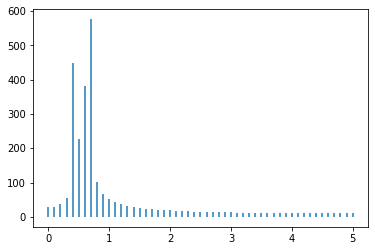

In [205]:
freqs = np.fft.rfftfreq(100, d=dt)
peaks = np.fft.rfft(x, n=100)
plt.stem(freqs, abs(peaks), markerfmt=" ", basefmt=" ")

In [169]:
abs(peaks)[np.where(freqs==1)[0][0]]

0.5282377263113947

In [206]:
freqs[np.argmax(abs(peaks))]

0.7000000000000001

In [171]:
abs(peaks)

array([2.62443428e+00, 2.80215610e+00, 3.51430469e+00, 6.07427332e+00,
       4.99272564e+02, 4.67048732e+00, 2.12700279e+00, 1.30162773e+00,
       9.03845932e-01, 6.74689852e-01, 5.28237726e-01, 4.27994502e-01,
       3.55930811e-01, 3.02172974e-01, 2.60891476e-01, 2.28440858e-01,
       2.02435336e-01, 1.81254719e-01, 1.63764444e-01, 1.49149161e-01,
       1.36809780e-01, 1.26297564e-01, 1.17270695e-01, 1.09464903e-01,
       1.02673159e-01, 9.67313545e-02, 9.15080133e-02, 8.68967942e-02,
       8.28109387e-02, 7.91791096e-02, 7.59422324e-02, 7.30510744e-02,
       7.04643680e-02, 6.81473443e-02, 6.60705767e-02, 6.42090627e-02,
       6.25414894e-02, 6.10496421e-02, 5.97179259e-02, 5.85329765e-02,
       5.74833425e-02, 5.65592255e-02, 5.57522660e-02, 5.50553690e-02,
       5.44625601e-02, 5.39688687e-02, 5.35702332e-02, 5.32634257e-02,
       5.30459935e-02, 5.29162145e-02, 5.28730677e-02])